In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
import tensorflow as tf
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from tensorflow.keras.models import save_model
# import pickle
import os

In [2]:
df = pd.read_csv('data_cleaned.csv')


In [8]:
df=df[0:50000]

In [9]:
statements = df['statement'].values
labels = df['speaker'].values

In [11]:
# Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(labels)

In [12]:
# Vectorize text data
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(statements).toarray()

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
time_steps = 1  # Since we are using TF-IDF vectorization, each document is considered as a single time step
input_features = X_train.shape[1]
X_train_rnn = X_train.reshape(-1, time_steps, input_features)
X_test_rnn = X_test.reshape(-1, time_steps, input_features)

In [15]:
model = Sequential([
    SimpleRNN(128, input_shape=(time_steps, input_features), activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

c:\Users\harsh\anaconda3\envs\Machinelearning\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [16]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [17]:
history = model.fit(X_train_rnn, y_train, validation_split=0.2, epochs=5, batch_size=32)


Epoch 1/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 38s 36ms/step - accuracy: 0.9759 - loss: 0.1113 - val_accuracy: 0.9949 - val_loss: 0.0138
Epoch 2/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 38s 38ms/step - accuracy: 0.9995 - loss: 0.0017 - val_accuracy: 0.9954 - val_loss: 0.0161
Epoch 3/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 25s 25ms/step - accuracy: 0.9998 - loss: 6.2056e-04 - val_accuracy: 0.9960 - val_loss: 0.0163
Epoch 4/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 24s 24ms/step - accuracy: 1.0000 - loss: 3.9789e-05 - val_accuracy: 0.9961 - val_loss: 0.0173
Epoch 5/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 25s 25ms/step - accuracy: 1.0000 - loss: 1.3280e-05 - val_accuracy: 0.9961 - val_loss: 0.0178


In [18]:
test_loss, test_accuracy = model.evaluate(X_test_rnn, y_test)
print("Test accuracy is: {:.2f}%".format(test_accuracy * 100))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9958 - loss: 0.0111
Test accuracy is: 99.54%


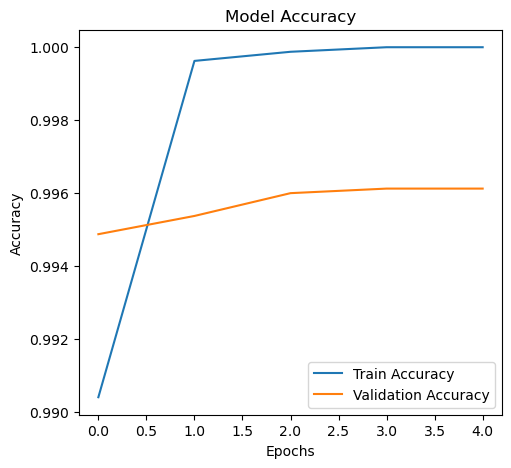

In [19]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()


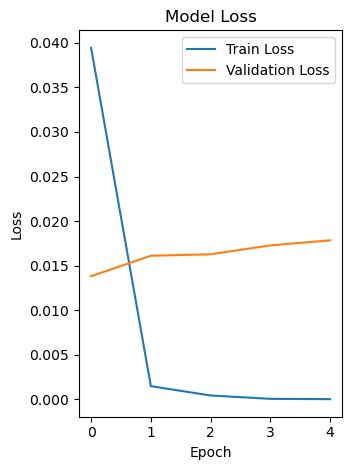

In [20]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()

In [30]:
model.save("SimpleRnn.h5")

In [32]:
model_size = os.path.getsize("SimpleRnn.h5")

In [33]:
print("model size = ", model_size)

model size =  55423816
